In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Load data
data = pd.read_csv('dataset_tingkat_stress.csv')

In [ ]:
# Define features
features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']

# Extract features
X = data[features]

# Calculate score
data['Score'] = X.sum(axis=1)

# Determine the level based on the score
def stress_level(score):
    if score <= 7:
        return 0  # Normal
    elif score <= 11:
        return 1  # Stres ringan
    elif score <= 15:
        return 2  # Stres sedang
    elif score <= 20:
        return 3  # Stres berat
    else:
        return 4  # Stres cukup berat

data['Level'] = data['Score'].apply(stress_level)
y = data['Level']

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data
train_percent = 0.8
test_percent = 1 - train_percent

# Calculate the amount of data for training and testing
total_data = len(X_scaled)
train_size = int(total_data * train_percent)
test_size = total_data - train_size

# Split data using calculated percentages
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 3397 (13.27 KB)
Trainable params: 3397 (13.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
38/38 [==============================] - 2s 14ms/step - loss: 1.5551 - accuracy: 0.2980 - val_loss: 1.4530 - val_accuracy: 0.3026
Epoch 2/50
38/38 [==============================] - 0s 7ms/step - loss: 1.3683 - accuracy: 0.4338 - val_loss: 1.2925 - val_accuracy: 0.4474
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 1.1646 - accuracy: 0.5563 - val_loss: 1.0832 - val_accuracy: 0.5000
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 0.9459 - accuracy: 0.6291 - val_loss: 0.8661 - val_accuracy: 0.6447
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7335 - accuracy: 0.7649 - val_loss: 0.6756 - val_accuracy: 0.7500
Epoch 6/50
38/38 [==============================] - 0s 7ms/step - loss: 0.5704 - accuracy: 0.8444 - val_loss: 0.5419 - val_accuracy: 0.8289
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.8642 - val_loss: 0.4759 - val_accuracy: 0.8158
Epoch 8/50
38/38 [=

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

3/3 [==============================] - 0s 9ms/step - loss: 0.1671 - accuracy: 0.9211
Accuracy: 92.11%


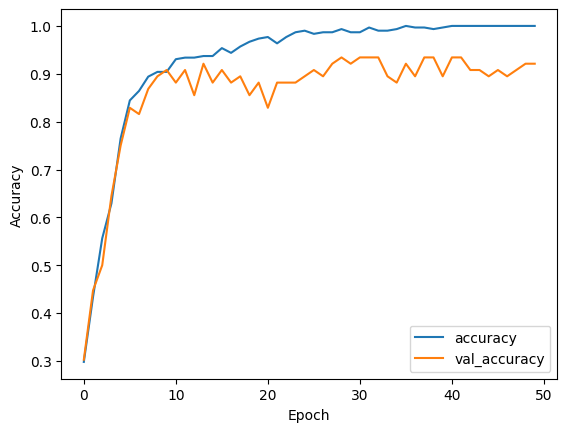

In [ ]:
# Plot history to see loss and accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('model_tingkat_stress.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Define column names used in training
feature_names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']

# Function for stress level prediction with multiple inputs
def predict_stress_levels(features_list):
    features_df = pd.DataFrame(features_list, columns=feature_names)
    features_scaled = scaler.transform(features_df)
    predictions = model.predict(features_scaled)
    predicted_classes = predictions.argmax(axis=1)
    level_mapping = {0: 'Normal', 1: 'Stres ringan', 2: 'Stres sedang', 3: 'Stres berat', 4: 'Stres cukup berat'}
    predicted_levels = [level_mapping[predicted_class] for predicted_class in predicted_classes]
    return predicted_levels

# Prediction examples with multiple feature sets
sample_features_list = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 2, 0, 1, 1, 0, 0, 1, 0],
    [0, 4, 0, 1, 0, 0, 0, 2, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [3, 4, 1, 0, 0, 3, 0, 0, 0, 0],
    [0, 0, 4, 1, 0, 1, 0, 1, 2, 3],
    [3, 1, 1, 2, 1, 3, 0, 3, 0, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [2, 0, 0, 3, 1, 0, 4, 2, 1, 3],
    [2, 3, 0, 0, 4, 2, 1, 3, 3, 2],
    [2, 2, 3, 0, 0, 2, 4, 4, 4, 0],
    [4, 0, 4, 2, 3, 3, 2, 1, 4, 4],
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
]  # Replace with new feature data

predicted_levels = predict_stress_levels(sample_features_list)
for i, features in enumerate(sample_features_list):
    print(f'Features: {features} -> Tingkat stres yang diprediksi: {predicted_levels[i]}')

1/1 [==============================] - 0s 102ms/step
Features: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> Tingkat stres yang diprediksi: Normal
Features: [2, 0, 2, 0, 1, 1, 0, 0, 1, 0] -> Tingkat stres yang diprediksi: Normal
Features: [0, 4, 0, 1, 0, 0, 0, 2, 1, 0] -> Tingkat stres yang diprediksi: Stres ringan
Features: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Tingkat stres yang diprediksi: Stres ringan
Features: [3, 4, 1, 0, 0, 3, 0, 0, 0, 0] -> Tingkat stres yang diprediksi: Stres sedang
Features: [0, 0, 4, 1, 0, 1, 0, 1, 2, 3] -> Tingkat stres yang diprediksi: Stres ringan
Features: [3, 1, 1, 2, 1, 3, 0, 3, 0, 1] -> Tingkat stres yang diprediksi: Stres sedang
Features: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] -> Tingkat stres yang diprediksi: Stres cukup berat
Features: [2, 0, 0, 3, 1, 0, 4, 2, 1, 3] -> Tingkat stres yang diprediksi: Stres sedang
Features: [2, 3, 0, 0, 4, 2, 1, 3, 3, 2] -> Tingkat stres yang diprediksi: Stres berat
Features: [2, 2, 3, 0, 0, 2, 4, 4, 4, 0] -> Tingkat stres yang diprediksi: 

In [ ]:
def predict_stress_levels_from_data(data):
    X_features = data[feature_names]
    X_scaled_features = scaler.transform(X_features)
    predictions = model.predict(X_scaled_features)
    predicted_classes = predictions.argmax(axis=1)
    level_mapping = {0: 'Normal', 1: 'Stres ringan', 2: 'Stres sedang', 3: 'Stres berat', 4: 'Stres cukup berat'}
    predicted_levels = [level_mapping[predicted_class] for predicted_class in predicted_classes]
    actual_levels = data['Level'].tolist()  # Get actual levels from dataset

    for i, (index, row) in enumerate(data.iterrows()):
        features = row[feature_names].tolist()
        predicted_level = predicted_levels[i]
        actual_level = actual_levels[i]
        actual_stress = level_mapping[actual_level]
        print(f'Features: {features} -> Prediksi: {predicted_level}, Tingkat Stress Sebenarnya: {actual_stress}')

    return predicted_levels, actual_levels

# Prediction using dataset features
predicted_levels_from_data, actual_levels = predict_stress_levels_from_data(data)

12/12 [==============================] - 0s 2ms/step
Features: [3, 3, 3, 1, 1, 2, 1, 2, 2, 2] -> Prediksi: Stres berat, Tingkat Stress Sebenarnya: Stres berat
Features: [1, 4, 2, 3, 0, 0, 0, 2, 1, 2] -> Prediksi: Stres sedang, Tingkat Stress Sebenarnya: Stres sedang
Features: [1, 4, 3, 3, 1, 3, 1, 2, 1, 1] -> Prediksi: Stres berat, Tingkat Stress Sebenarnya: Stres berat
Features: [2, 2, 2, 0, 1, 2, 0, 1, 0, 4] -> Prediksi: Stres sedang, Tingkat Stress Sebenarnya: Stres sedang
Features: [2, 0, 1, 1, 1, 0, 0, 0, 0, 0] -> Prediksi: Normal, Tingkat Stress Sebenarnya: Normal
Features: [0, 3, 1, 0, 1, 1, 0, 1, 0, 0] -> Prediksi: Normal, Tingkat Stress Sebenarnya: Normal
Features: [2, 0, 1, 1, 2, 1, 2, 1, 2, 0] -> Prediksi: Stres sedang, Tingkat Stress Sebenarnya: Stres sedang
Features: [2, 0, 0, 0, 2, 0, 0, 0, 1, 2] -> Prediksi: Normal, Tingkat Stress Sebenarnya: Normal
Features: [0, 1, 0, 0, 2, 0, 0, 2, 1, 1] -> Prediksi: Normal, Tingkat Stress Sebenarnya: Normal
Features: [1, 2, 2, 2, 3, 3